<a href="https://colab.research.google.com/github/pratchad17/Allergon-Interactive-Course/blob/main/48726591_Safkat%20Hasin%20Alavi_Portfolio-part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [2]:
your_name = "Safkat Hasin Alavi"
your_student_id = "48726591"

In [3]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
#dataset
original_car_data = pd.read_csv('car_sell.csv')

In [ ]:
original_car_datacar_data=pd.read_csv('car_sell.csv')

In [8]:
print(original_car_data.shape)
#lenth
len(original_car_data)
#information about data_set
original_car_data.describe()

(4340, 9)


,Unnamed: 0,year,selling_price,km_driven
count,4340.000000,4030.000000,4.340000e+03,4340.000000
mean,2169.500000,2013.094293,5.041273e+05,66215.777419
std,1252.994413,4.201613,5.785487e+05,46644.102194
min,0.000000,1992.000000,2.000000e+04,1.000000
25%,1084.750000,2011.000000,2.087498e+05,35000.000000
50%,2169.500000,2014.000000,3.500000e+05,60000.000000
75%,3254.250000,2016.000000,6.000000e+05,90000.000000
max,4339.000000,2020.000000,8.900000e+06,806599.000000


In [9]:
original_car_data.isnull().sum()

,0
Unnamed: 0,0
name,0
year,310
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [13]:
# Q1: Remove missing data
# cleaned_data = original_car_data.dropna(subset=['year'])
# cleaned_data = cleaned_data[cleaned_data['fuel'].str.lower() != 'none']
#missing year
year_clean=original_car_data.dropna()

In [14]:
#remove the rows with mising year
clear=year_clean.drop(
    year_clean.index[
        year_clean['fuel'] == 'none'
    ]
)

In [15]:
print(clear.shape)

(3886, 9)


In [16]:
# Q2: Descriptive Statistics
# Q2.1: Unique counts
# unique_counts = {
#     'unique_name': cleaned_data['name'].nunique(),
#     'unique_seller_type': cleaned_data['seller_type'].nunique(),
#     'unique_transmission': cleaned_data['transmission'].nunique(),
#     'unique_owner': cleaned_data['owner'].nunique()
# }
name_list=clear['name'].unique()
len(name_list)


# Q2.3: Descriptive statistics for 'selling_price' grouped by 'seller_type'
# selling_price_stats_by_seller_type = cleaned_data.groupby('seller_type')['selling_price'].agg(['mean', 'std', 'min', 'max'])

# Q2.4: Descriptive statistics for the number of years the cars were sold by each 'owner' type
# cleaned_data['years_owned'] = 2024 - cleaned_data['year']
# years_owned_stats_by_owner = cleaned_data.groupby('owner')['years_owned'].agg(['mean', 'std', 'min', 'max'])

1402

In [17]:
# Q2.2: Descriptive statistics for 'km_driven'
km_list = clear['km_driven']
km_list.describe()

,km_driven
count,3886.000000
mean,66313.279207
std,46679.603916
min,1.000000
25%,35000.000000
50%,60000.000000
75%,90000.000000
max,806599.000000


In [18]:
#Q2.3 describe() of the number of selling_price grouped by differenrt seller type
seller_group = clear.groupby(['seller_type'])
seller_type_selling_price_num=seller_group['selling_price'].count().reset_index(name='number') #count
seller_type_selling_price_num.describe()

,number
count,3.000000
mean,1295.333333
std,1447.912405
min,94.000000
25%,491.500000
50%,889.000000
75%,1896.000000
max,2903.000000


In [19]:
seller_group.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner
12,12,Toyota Corolla Altis 1.8 VL CVT,2018.0,1650000,25000,Petrol,Dealer,Automatic,First Owner
25,25,Toyota Corolla Altis 1.8 VL CVT,2018.0,1650000,25000,Petrol,Dealer,Automatic,First Owner
26,26,Maruti Ciaz VXi Plus,2015.0,585000,24000,Petrol,Dealer,Manual,First Owner
27,27,Hyundai Venue SX Opt Diesel,2019.0,1195000,5000,Diesel,Dealer,Manual,First Owner
29,29,Jaguar XF 2.2 Litre Luxury,2014.0,1964999,28000,Diesel,Dealer,Automatic,First Owner


In [20]:
#Q2.4  describe() of the number of year owner type
owner_group= clear.groupby(['owner'])
year_num = owner_group['year'].count().reset_index(name='number of years')
year_num.describe()

,number of years
count,5.000000
mean,777.200000
std,1057.123314
min,14.000000
25%,67.000000
50%,273.000000
75%,1000.000000
max,2532.000000


In [21]:
#Q3. Plotting and Analysis


#fuel vs selling_price
#year vs selling_price
#seller_type vs selling_price
# transmission vs selling_price
# owner vs selling_price

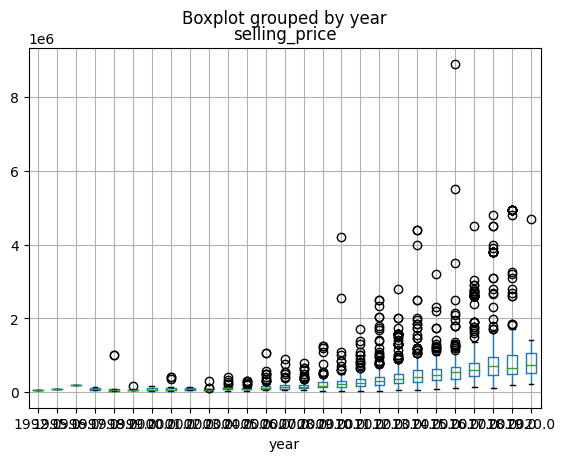

In [22]:


clear.boxplot('selling_price', by='year')
plt.xticks() # Changed 'xtrick' to 'xticks'
plt.show()

In [23]:
clear.to_csv("original_car_data")

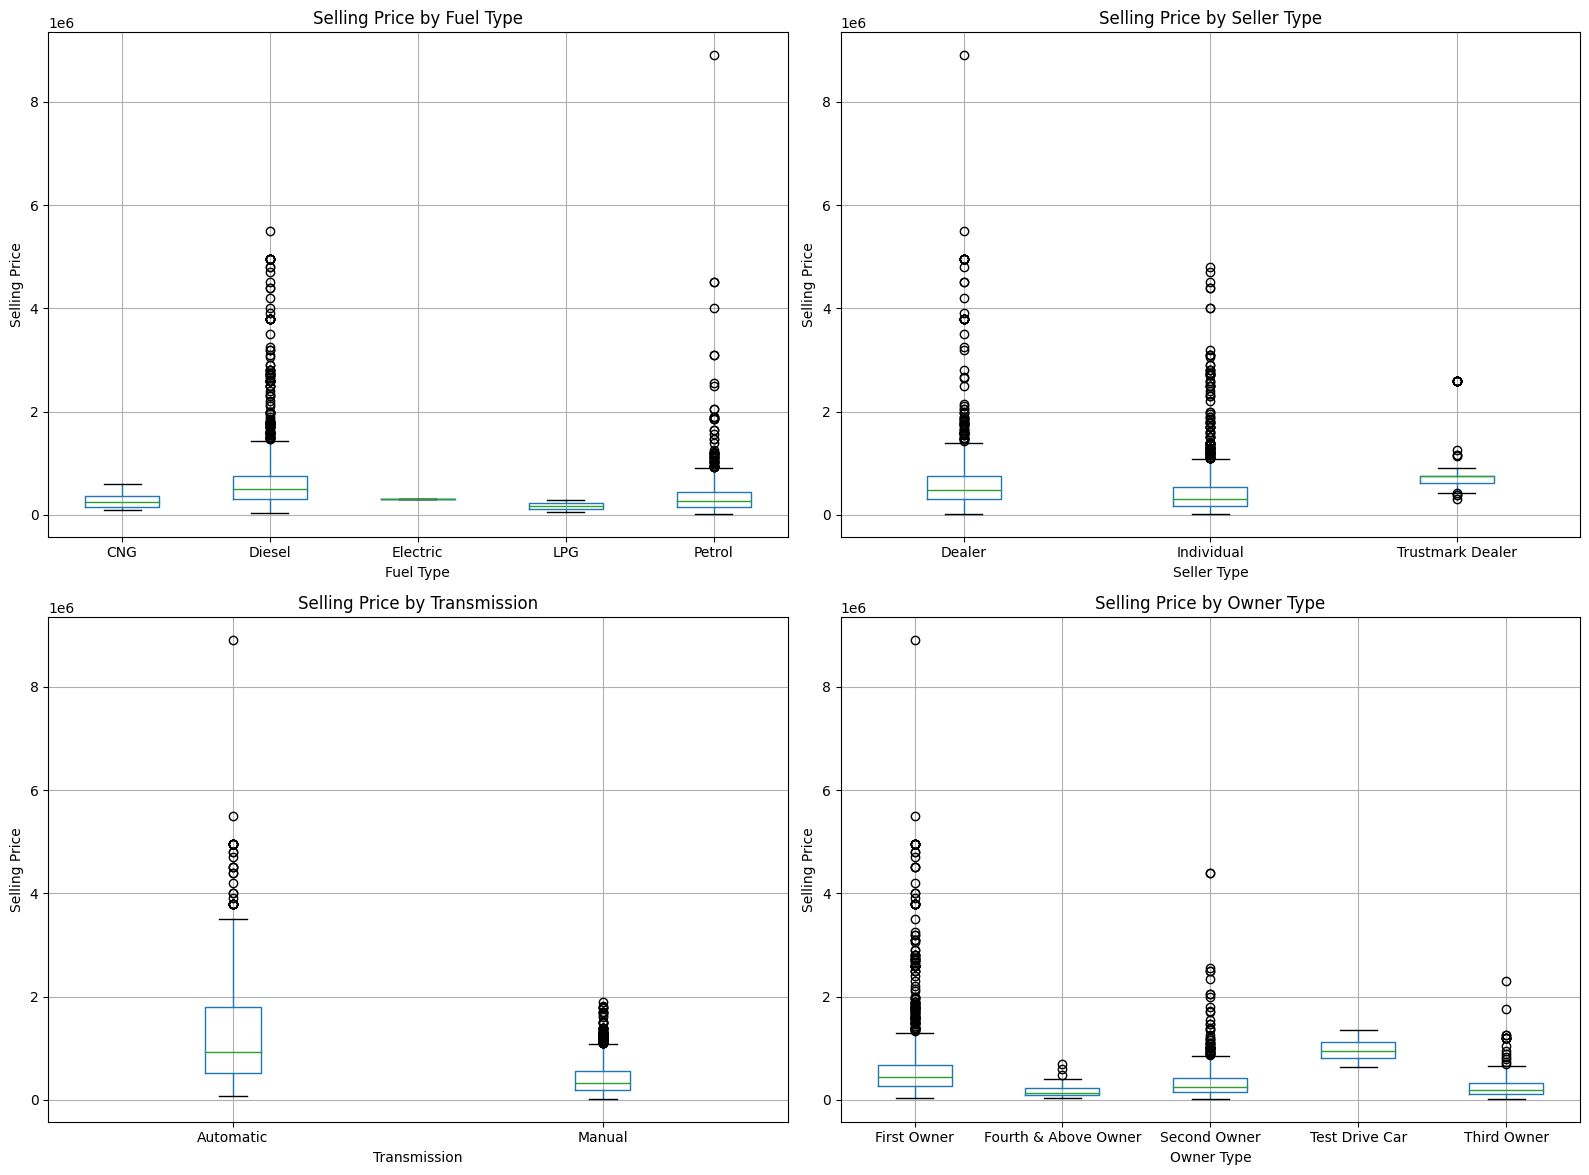

In [25]:
#figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#Fuel Type vs Selling Price
clear.boxplot(column='selling_price', by='fuel', ax=axes[0, 0])
axes[0, 0].set_title('Selling Price by Fuel Type')
axes[0, 0].set_xlabel('Fuel Type')
axes[0, 0].set_ylabel('Selling Price')

# Seller Type vs Selling Price
clear.boxplot(column='selling_price', by='seller_type', ax=axes[0, 1])
axes[0, 1].set_title('Selling Price by Seller Type')
axes[0, 1].set_xlabel('Seller Type')
axes[0, 1].set_ylabel('Selling Price')

#Transmission vs Selling Price
clear.boxplot(column='selling_price', by='transmission', ax=axes[1, 0])
axes[1, 0].set_title('Selling Price by Transmission')
axes[1, 0].set_xlabel('Transmission')
axes[1, 0].set_ylabel('Selling Price')

#Owner Type vs Selling Price
clear.boxplot(column='selling_price', by='owner', ax=axes[1, 1])
axes[1, 1].set_title('Selling Price by Owner Type')
axes[1, 1].set_xlabel('Owner Type')
axes[1, 1].set_ylabel('Selling Price')

#Remove  boxplot titles
plt.suptitle('')
plt.tight_layout()

# Display the plots
plt.show()

In [29]:
#Q4

first_clean = clear.loc[
    (clear['owner'] == 'First Owner') | (clear['owner'] == 'Second Owner') | (clear['owner'] == 'Third Owner')]


second_clean = first_clean.loc[
    (first_clean['fuel'] == 'Petrol') |
    (first_clean['fuel'] == 'Diesel')
]

third_clean = second_clean.loc[
    (second_clean['seller_type'] == 'Individual') |
    (second_clean['seller_type'] == 'Dealer')
]
#Final dataset
print(f"Final dataset: {third_clean.shape}")

#Final cleaned dataset
print("Final cleaned dataset:")
display(third_clean.head())

Final dataset: (3657, 9)
Final cleaned dataset:


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner
